# Plan your trip with Kayak

## 1.Projet Description

Project 🚧
The marketing team needs help on a new project. After doing some user research, the team discovered that 70% of their users who are planning a trip would like to have more information about the destination they are going to.

In addition, user research shows that people tend to be defiant about the information they are reading if they don't know the brand which produced the content.

Therefore, Kayak Marketing Team would like to create an application that will recommend where people should plan their next holidays. The application should be based on real data about:

Weather
Hotels in the area
The application should then be able to recommend the best destinations and hotels based on the above variables at any given time.

## 2.API and Web Scrapping

### 2.1.API Openstreetmap

In [2]:
!pip install Scrapy

  Using cached Scrapy-2.5.1-py2.py3-none-any.whl (254 kB)
  Using cached h2-3.2.0-py2.py3-none-any.whl (65 kB)
  Using cached itemloaders-1.0.4-py3-none-any.whl (11 kB)
     |████████████████████████████████| 47 kB 3.7 MB/s             
  Preparing metadata (setup.py) ... done
  Using cached w3lib-1.22.0-py2.py3-none-any.whl (20 kB)
     |████████████████████████████████| 3.1 MB 22.9 MB/s            
     |████████████████████████████████| 6.9 MB 34.6 MB/s            
  Using cached itemadapter-0.4.0-py3-none-any.whl (10 kB)
  Using cached parsel-1.6.0-py2.py3-none-any.whl (13 kB)
  Using cached service_identity-21.1.0-py2.py3-none-any.whl (12 kB)
     |████████████████████████████████| 255 kB 34.4 MB/s            
  Using cached queuelib-1.6.2-py2.py3-none-any.whl (13 kB)
  Using cached cssselect-1.1.0-py2.py3-none-any.whl (16 kB)
  Using cached hyperframe-5.2.0-py2.py3-none-any.whl (12 kB)
  Using cached hpack-3.0.0-py2.py3-none-any.whl (38 kB)
  Using cached jmespath-0.10.0-py2.py3-

In [3]:
!pip install plotly

In [5]:
#Imports librairies
import pandas as pd
import requests
import os
import plotly.express as px
# Import logging => Library used for logs manipulation 
## More info => https://docs.python.org/3/library/logging.html
import logging

# Import scrapy and scrapy.crawler 
import scrapy
from scrapy.crawler import CrawlerProcess

2022-02-17 12:25:29 [numexpr.utils] INFO: NumExpr defaulting to 4 threads.


In [55]:
#top 35 cities
city_names = ["Mont Saint Michel","St Malo","Bayeux","Le Havre","Rouen","Paris","Amiens","Lille","Strasbourg","Château du Haut Koenigsbourg","Colmar",
"Eguisheim","Besancon","Dijon","Annecy","Grenoble","Lyon","Gorges du Verdon","Bormes les Mimosas","Cassis","Marseille","Aix en Provence","Avignon",
"Uzès","Nîmes","Aigues Mortes","Saintes Maries de la mer","Collioure","Carcassonne","Ariège","Toulouse","Montauban","Biarritz","Bayonne",
"La Rochelle"]

In [56]:
#create dataframe
df = pd.DataFrame(columns=['city_id' , 'city_names'])
df

,city_id,city_names


In [57]:
# Making a dataframe from our list of cities
for i in range (len(city_names)):
    df.loc[i,'city_id'] = i+1
    df.loc[i,'city_names'] = city_names[i]
df

,city_id,city_names
0,1,Mont Saint Michel
1,2,St Malo
2,3,Bayeux
3,4,Le Havre
4,5,Rouen
5,6,Paris
6,7,Amiens
7,8,Lille
8,9,Strasbourg
9,10,Château du Haut Koenigsbourg


In [58]:
#connection to Openstreetmap API for GPS coordinates

for i in range(len(city_names)):
    #print("making request: {}".format(city_names[i]))
    
    #get latitude and longitude of cities    
    par = {
        "q": city_names[i],
        "country": "France",
        "format": "json"
          }
    
    r = requests.get('https://nominatim.openstreetmap.org/search', params=par)
    res = r.json()
    
    #fix lat and lon
    df.loc[i,'Latitude'] = res[0]['lat']
    df.loc[i,'Longitude'] = res[0]['lon']
    
df

,city_id,city_names,Latitude,Longitude
0,1,Mont Saint Michel,48.6359541,-1.511459954959514
1,2,St Malo,48.649518,-2.0260409
2,3,Bayeux,49.2764624,-0.7024738
3,4,Le Havre,49.4938975,0.1079732
4,5,Rouen,49.4404591,1.0939658
5,6,Paris,48.8588897,2.3200410217200766
6,7,Amiens,49.8941708,2.2956951
7,8,Lille,50.6365654,3.0635282
8,9,Strasbourg,48.584614,7.7507127
9,10,Château du Haut Koenigsbourg,48.249489800000006,7.34429620253195


In [59]:
#stockage dans un csv
os.makedirs('./data', exist_ok=True)  
df.to_csv('./data/cities_geocode.csv',index = False)  

In [60]:
df = pd.read_csv('./data/cities_geocode.csv')
df

,city_id,city_names,Latitude,Longitude
0,1,Mont Saint Michel,48.635954,-1.511460
1,2,St Malo,48.649518,-2.026041
2,3,Bayeux,49.276462,-0.702474
3,4,Le Havre,49.493897,0.107973
4,5,Rouen,49.440459,1.093966
5,6,Paris,48.858890,2.320041
6,7,Amiens,49.894171,2.295695
7,8,Lille,50.636565,3.063528
8,9,Strasbourg,48.584614,7.750713
9,10,Château du Haut Koenigsbourg,48.249490,7.344296


### 2.2.API OpenWeather

In [104]:
#connection to OpenWeather API for weather
api_key = open("./data/OpenWeather_API_KEY.txt", "r")
api_key = api_key.read()

72ea71a8e14d59d89841a2c2a2798c1a


In [102]:
# How does a weather informations request looks like?
url = 'https://api.openweathermap.org/data/2.5/onecall?lat=43.7497&lon=6.32859&units=metric&exclude=current,minutely,hourly&appid={}'.format(api_key)
resp = requests.get(url)
resp.json()

{'lat': 43.7497,
 'lon': 6.3286,
 'timezone': 'Europe/Paris',
 'timezone_offset': 3600,
 'daily': [{'dt': 1643194800,
   'sunrise': 1643180262,
   'sunset': 1643214985,
   'moonrise': 1643158140,
   'moonset': 1643195340,
   'moon_phase': 0.78,
   'temp': {'day': 9.86,
    'min': 0.99,
    'max': 9.86,
    'night': 1.89,
    'eve': 5.9,
    'morn': 1.22},
   'feels_like': {'day': 9.86, 'night': 1.89, 'eve': 5.9, 'morn': -0.67},
   'pressure': 1026,
   'humidity': 31,
   'dew_point': -5.74,
   'wind_speed': 1.71,
   'wind_deg': 24,
   'wind_gust': 1.42,
   'weather': [{'id': 800,
     'main': 'Clear',
     'description': 'clear sky',
     'icon': '01d'}],
   'clouds': 0,
   'pop': 0,
   'uvi': 1.51},
  {'dt': 1643281200,
   'sunrise': 1643266607,
   'sunset': 1643301466,
   'moonrise': 1643249160,
   'moonset': 1643283720,
   'moon_phase': 0.82,
   'temp': {'day': 10.13,
    'min': 1.71,
    'max': 10.94,
    'night': 2.48,
    'eve': 3.66,
    'morn': 1.71},
   'feels_like': {'day': 8.

In [125]:
#get weather
for i in range (len(city_names)):
    
    par = {
        "lat": df.loc[i, 'Latitude'],
        "lon": df.loc[i, 'Longitude'],
        "exclude": "current,minutely,hourly",
        "units": "metric",
        "appid": api_key,
           }
    
    res = requests.get('https://api.openweathermap.org/data/2.5/onecall', params=par)
    
    
    df.loc[i,'Temp Today'] = res.json()['daily'][0]['temp']['day']
    df.loc[i,'Temp Day +1'] = res.json()['daily'][1]['temp']['day']
    df.loc[i,'Temp Day +2'] = res.json()['daily'][2]['temp']['day']
    df.loc[i,'Temp Day +3'] = res.json()['daily'][3]['temp']['day']
    df.loc[i,'Temp Day +4'] = res.json()['daily'][4]['temp']['day']
    df.loc[i,'Temp Day +5'] = res.json()['daily'][5]['temp']['day']
    df.loc[i,'Temp Day +6'] = res.json()['daily'][6]['temp']['day']
    df.loc[i,'Temp Day +7'] = res.json()['daily'][7]['temp']['day']
    
    df.loc[i,'humidity Today'] = res.json()['daily'][0]['humidity']
    df.loc[i,'humidity Day +1'] = res.json()['daily'][1]['humidity']
    df.loc[i,'humidity Day +2'] = res.json()['daily'][2]['humidity']
    df.loc[i,'humidity Day +3'] = res.json()['daily'][3]['humidity']
    df.loc[i,'humidity Day +4'] = res.json()['daily'][4]['humidity']
    df.loc[i,'humidity Day +5'] = res.json()['daily'][5]['humidity']
    df.loc[i,'humidity Day +6'] = res.json()['daily'][6]['humidity']
    df.loc[i,'humidity Day +7'] = res.json()['daily'][7]['humidity']
    
    df.loc[i,'weather Today'] = res.json()['daily'][0]['weather'][0]['description']
    df.loc[i,'weather Day+1'] = res.json()['daily'][1]['weather'][0]['description']
    df.loc[i,'weather Day+2'] = res.json()['daily'][2]['weather'][0]['description']
    df.loc[i,'weather Day+3'] = res.json()['daily'][3]['weather'][0]['description']
    df.loc[i,'weather Day+4'] = res.json()['daily'][4]['weather'][0]['description']
    df.loc[i,'weather Day+5'] = res.json()['daily'][5]['weather'][0]['description']
    df.loc[i,'weather Day+6'] = res.json()['daily'][6]['weather'][0]['description']
    df.loc[i,'weather Day+7'] = res.json()['daily'][7]['weather'][0]['description']

df
    
    

,city_id,city_names,Latitude,Longitude,Temp Day,Temp Day +1,Temp Day +2,Temp Day +3,Temp Day +4,Temp Day +5,...,Avg Temp,Avg humidity,weather Today,weather Day+1,weather Day+2,weather Day+3,weather Day+4,weather Day+5,weather Day+6,weather Day+7
0,1,Mont Saint Michel,48.635954,-1.511460,6.15,9.26,10.65,11.67,9.54,9.20,...,10.0,76.0,clear sky,broken clouds,broken clouds,overcast clouds,overcast clouds,light rain,few clouds,overcast clouds
1,2,St Malo,48.649518,-2.026041,6.02,9.09,10.31,11.13,8.75,8.91,...,9.0,78.0,broken clouds,light rain,broken clouds,overcast clouds,overcast clouds,broken clouds,light rain,overcast clouds
2,3,Bayeux,49.276462,-0.702474,6.42,10.32,9.83,12.30,7.87,8.78,...,9.0,73.0,overcast clouds,broken clouds,broken clouds,overcast clouds,scattered clouds,overcast clouds,scattered clouds,few clouds
3,4,Le Havre,49.493897,0.107973,6.43,8.42,8.61,10.23,7.61,8.28,...,8.0,78.0,overcast clouds,light rain,overcast clouds,light rain,light rain,light rain,broken clouds,few clouds
4,5,Rouen,49.440459,1.093966,5.52,8.52,8.82,11.89,7.54,7.74,...,9.0,75.0,overcast clouds,broken clouds,overcast clouds,broken clouds,few clouds,broken clouds,overcast clouds,scattered clouds
5,6,Paris,48.858890,2.320041,3.45,7.15,7.66,11.34,8.17,8.89,...,8.0,70.0,scattered clouds,scattered clouds,broken clouds,few clouds,scattered clouds,light rain,broken clouds,scattered clouds
6,7,Amiens,49.894171,2.295695,4.56,8.77,8.02,10.42,6.94,7.19,...,8.0,79.0,overcast clouds,overcast clouds,broken clouds,broken clouds,clear sky,light rain,overcast clouds,broken clouds
7,8,Lille,50.636565,3.063528,4.60,8.22,7.64,9.66,7.55,6.99,...,8.0,79.0,overcast clouds,overcast clouds,broken clouds,overcast clouds,light rain,light rain,broken clouds,scattered clouds
8,9,Strasbourg,48.584614,7.750713,3.65,4.12,4.94,5.45,7.71,5.29,...,5.0,66.0,clear sky,overcast clouds,light rain,overcast clouds,light rain,light rain,light rain,light rain
9,10,Château du Haut Koenigsbourg,48.249490,7.344296,2.61,3.27,3.30,4.36,5.99,1.92,...,3.0,68.0,clear sky,light rain,light rain,overcast clouds,light rain,rain and snow,rain and snow,rain and snow


In [126]:
# Create a column with the average temperature in a week
df['Avg Temp'] = round(df[['Temp Day', 'Temp Day +1','Temp Day +2','Temp Day +3','Temp Day +4','Temp Day +5','Temp Day +6','Temp Day +7']].mean(axis=1))
df['Avg humidity'] = round(df[['humidity Today', 'humidity Day +1','humidity Day +2','humidity Day +3','humidity Day +4','humidity Day +5','humidity Day +6','humidity Day +7']].mean(axis=1))
df.head()

,city_id,city_names,Latitude,Longitude,Temp Day,Temp Day +1,Temp Day +2,Temp Day +3,Temp Day +4,Temp Day +5,...,Avg Temp,Avg humidity,weather Today,weather Day+1,weather Day+2,weather Day+3,weather Day+4,weather Day+5,weather Day+6,weather Day+7
0,1,Mont Saint Michel,48.635954,-1.511460,6.15,9.26,10.65,11.67,9.54,9.20,...,10.0,76.0,clear sky,broken clouds,broken clouds,overcast clouds,overcast clouds,light rain,few clouds,overcast clouds
1,2,St Malo,48.649518,-2.026041,6.02,9.09,10.31,11.13,8.75,8.91,...,9.0,78.0,broken clouds,light rain,broken clouds,overcast clouds,overcast clouds,broken clouds,light rain,overcast clouds
2,3,Bayeux,49.276462,-0.702474,6.42,10.32,9.83,12.30,7.87,8.78,...,9.0,73.0,overcast clouds,broken clouds,broken clouds,overcast clouds,scattered clouds,overcast clouds,scattered clouds,few clouds
3,4,Le Havre,49.493897,0.107973,6.43,8.42,8.61,10.23,7.61,8.28,...,8.0,78.0,overcast clouds,light rain,overcast clouds,light rain,light rain,light rain,broken clouds,few clouds
4,5,Rouen,49.440459,1.093966,5.52,8.52,8.82,11.89,7.54,7.74,...,9.0,75.0,overcast clouds,broken clouds,overcast clouds,broken clouds,few clouds,broken clouds,overcast clouds,scattered clouds


In [127]:
df.to_csv('./data/cities_weather.csv', index=False)  

In [3]:
df = pd.read_csv('./data/cities_weather.csv')

In [17]:
# top 10 cities for the given week
ranking_avg_temp = df[['city_id','city_names','Longitude','Latitude','Avg Temp', 'Avg humidity', 'weather Today','weather Day+1','weather Day+2','weather Day+3','weather Day+4','weather Day+5','weather Day+6','weather Day+7']]
ranking_avg_temp = ranking_avg_temp.sort_values(by= ['Avg Temp','Avg humidity'], ascending=False).reset_index(drop=True)
ranking_avg_temp.loc[:,'rank_cities'] = ranking_avg_temp.index+1
ranking_avg_temp.head(10)

,city_id,city_names,Longitude,Latitude,Avg Temp,Avg humidity,weather Today,weather Day+1,weather Day+2,weather Day+3,weather Day+4,weather Day+5,weather Day+6,weather Day+7,rank_cities
0,28,Collioure,3.083155,42.525050,14.0,42.0,clear sky,clear sky,clear sky,clear sky,clear sky,clear sky,clear sky,clear sky,1
1,19,Bormes les Mimosas,6.329254,43.157217,12.0,53.0,clear sky,scattered clouds,clear sky,clear sky,clear sky,scattered clouds,clear sky,scattered clouds,2
2,20,Cassis,5.539632,43.214036,11.0,49.0,clear sky,scattered clouds,clear sky,clear sky,clear sky,few clouds,clear sky,clear sky,3
3,27,Saintes Maries de la mer,4.428717,43.452277,11.0,49.0,clear sky,clear sky,clear sky,clear sky,clear sky,clear sky,clear sky,clear sky,4
4,24,Uzès,4.419672,44.012128,11.0,46.0,clear sky,clear sky,clear sky,scattered clouds,clear sky,clear sky,clear sky,clear sky,5
5,26,Aigues Mortes,4.191284,43.565823,11.0,46.0,clear sky,clear sky,clear sky,clear sky,clear sky,clear sky,clear sky,clear sky,6
6,25,Nîmes,4.360069,43.837425,11.0,42.0,clear sky,clear sky,clear sky,few clouds,clear sky,clear sky,clear sky,clear sky,7
7,1,Mont Saint Michel,-1.511460,48.635954,10.0,76.0,clear sky,broken clouds,broken clouds,overcast clouds,overcast clouds,light rain,few clouds,overcast clouds,8
8,34,Bayonne,-1.475099,43.493338,10.0,64.0,clear sky,clear sky,clear sky,scattered clouds,clear sky,light rain,light rain,clear sky,9
9,29,Carcassonne,2.349107,43.213036,10.0,57.0,clear sky,clear sky,clear sky,clear sky,clear sky,light rain,light rain,clear sky,10


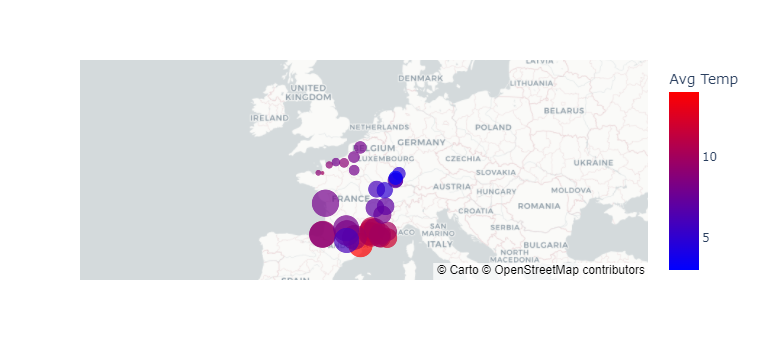

In [14]:
fig = px.scatter_mapbox(ranking_avg_temp, lat="Latitude", lon="Longitude", 
                        hover_data = ['Avg Temp', 'Avg humidity'], 
                        color = 'Avg Temp', color_continuous_scale = 'Bluered', size = 'city_id',
                        mapbox_style="carto-positron")
fig

### 2.3.Scrapping Booking.com

In [2]:
pip install scrapy

  Using cached Scrapy-2.5.1-py2.py3-none-any.whl (254 kB)
  Using cached zope.interface-5.4.0-cp38-cp38-manylinux2010_x86_64.whl (259 kB)
  Using cached parsel-1.6.0-py2.py3-none-any.whl (13 kB)
  Using cached cssselect-1.1.0-py2.py3-none-any.whl (16 kB)
  Using cached Twisted-21.7.0-py3-none-any.whl (3.1 MB)
  Using cached itemloaders-1.0.4-py3-none-any.whl (11 kB)
  Using cached queuelib-1.6.2-py2.py3-none-any.whl (13 kB)
  Using cached h2-3.2.0-py2.py3-none-any.whl (65 kB)
  Using cached service_identity-21.1.0-py2.py3-none-any.whl (12 kB)
Processing /home/jovyan/.cache/pip/wheels/91/64/36/bd0d11306cb22a78c7f53d603c7eb74ebb6c211703bc40b686/Protego-0.1.16-py3-none-any.whl
Processing /home/jovyan/.cache/pip/wheels/d1/d7/61/11b5b370ee487d38b5408ecb7e0257db9107fa622412cbe2ff/PyDispatcher-2.0.5-py3-none-any.whl
  Using cached lxml-4.7.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (6.9 MB)
  Using cached itemadapter-0.4.0-py3-none-any.whl (10 kB)
  Using

In [1]:
# Import os => Library used to easily manipulate operating systems
## More info => https://docs.python.org/3/library/os.html
import os 

# Import logging => Library used for logs manipulation 
## More info => https://docs.python.org/3/library/logging.html
import logging
import requests
# Import scrapy and scrapy.crawler 
import scrapy
from scrapy.crawler import CrawlerProcess

In [2]:
class Booking(scrapy.Spider):

    name = "booking"

    start_urls = [
        "https://www.booking.com/searchresults.fr.html?label=fr-85Sbyi2evytni3mHZEi6UgS267492169156%3Apl%3Ata%3Ap1%3Ap22.563.000%3Aac%3Aap%3Aneg%3Afi%3Atikwd-65526620%3Alp9056586%3Ali%3Adec%3Adm%3Appccp%3DUmFuZG9tSVYkc2RlIyh9Ye7BFAsTyVd6vvamF_no64o&sid=02b206a84eecccc147910770df8a2890&aid=376366&sb_lp=1&error_url=https%3A%2F%2Fwww.booking.com%2Findex.fr.html%3Faid%3D376366%3Blabel%3Dfr-85Sbyi2evytni3mHZEi6UgS267492169156%253Apl%253Ata%253Ap1%253Ap22.563.000%253Aac%253Aap%253Aneg%253Afi%253Atikwd-65526620%253Alp9056586%253Ali%253Adec%253Adm%253Appccp%253DUmFuZG9tSVYkc2RlIyh9Ye7BFAsTyVd6vvamF_no64o%3Bsid%3D02b206a84eecccc147910770df8a2890%3Bsb_price_type%3Dtotal%3Bsrpvid%3D9a93888d707e0185%26%3B&ss=Le+Mont-Saint-Michel%2C+Basse-Normandie%2C+France&is_ski_area=&checkin_year=&checkin_month=&checkout_year=&checkout_month=&group_adults=2&group_children=0&no_rooms=1&b_h4u_keep_filters=&from_sf=1&ss_raw=mont+s&ac_position=0&ac_langcode=fr&ac_click_type=b&dest_id=900039327&dest_type=city&place_id_lat=48.636&place_id_lon=-1.511&search_pageview_id=483d88b5c858000d&search_selected=true&search_pageview_id=483d88b5c858000d&ac_suggestion_list_length=5&ac_suggestion_theme_list_length=0&nflt=ht_id%3D204&order=bayesian_review_score",
        "https://www.booking.com/searchresults.fr.html?label=fr-85Sbyi2evytni3mHZEi6UgS267492169156%3Apl%3Ata%3Ap1%3Ap22.563.000%3Aac%3Aap%3Aneg%3Afi%3Atikwd-65526620%3Alp9056586%3Ali%3Adec%3Adm%3Appccp%3DUmFuZG9tSVYkc2RlIyh9Ye7BFAsTyVd6vvamF_no64o&sid=02b206a84eecccc147910770df8a2890&aid=376366&sb_lp=1&error_url=https%3A%2F%2Fwww.booking.com%2Findex.fr.html%3Faid%3D376366%3Blabel%3Dfr-85Sbyi2evytni3mHZEi6UgS267492169156%253Apl%253Ata%253Ap1%253Ap22.563.000%253Aac%253Aap%253Aneg%253Afi%253Atikwd-65526620%253Alp9056586%253Ali%253Adec%253Adm%253Appccp%253DUmFuZG9tSVYkc2RlIyh9Ye7BFAsTyVd6vvamF_no64o%3Bsid%3D02b206a84eecccc147910770df8a2890%3Bsb_price_type%3Dtotal%3Bsrpvid%3D23a888bbff44010b%26%3B&ss=Saint-Malo%2C+Bretagne%2C+France&is_ski_area=&checkin_year=&checkin_month=&checkout_year=&checkout_month=&group_adults=2&group_children=0&no_rooms=1&b_h4u_keep_filters=&from_sf=1&ss_raw=st&ac_position=0&ac_langcode=fr&ac_click_type=b&dest_id=-1466824&dest_type=city&place_id_lat=48.649616&place_id_lon=-2.025677&search_pageview_id=49c18913f3bc0253&search_selected=true&search_pageview_id=49c18913f3bc0253&ac_suggestion_list_length=5&ac_suggestion_theme_list_length=0&nflt=ht_id%3D204%3Bdistance%3D1000&order=bayesian_review_score",
        "https://www.booking.com/searchresults.fr.html?label=fr-85Sbyi2evytni3mHZEi6UgS267492169156%3Apl%3Ata%3Ap1%3Ap22.563.000%3Aac%3Aap%3Aneg%3Afi%3Atikwd-65526620%3Alp9056586%3Ali%3Adec%3Adm%3Appccp%3DUmFuZG9tSVYkc2RlIyh9Ye7BFAsTyVd6vvamF_no64o&sid=02b206a84eecccc147910770df8a2890&aid=376366&sb_lp=1&error_url=https%3A%2F%2Fwww.booking.com%2Findex.fr.html%3Faid%3D376366%3Blabel%3Dfr-85Sbyi2evytni3mHZEi6UgS267492169156%253Apl%253Ata%253Ap1%253Ap22.563.000%253Aac%253Aap%253Aneg%253Afi%253Atikwd-65526620%253Alp9056586%253Ali%253Adec%253Adm%253Appccp%253DUmFuZG9tSVYkc2RlIyh9Ye7BFAsTyVd6vvamF_no64o%3Bsid%3D02b206a84eecccc147910770df8a2890%3Bsb_price_type%3Dtotal%3Bsrpvid%3Daf4089ac072401ed%26%3B&ss=Bayeux%2C+Basse-Normandie%2C+France&is_ski_area=&checkin_year=&checkin_month=&checkout_year=&checkout_month=&group_adults=2&group_children=0&no_rooms=1&b_h4u_keep_filters=&from_sf=1&ss_raw=baye&ac_position=0&ac_langcode=fr&ac_click_type=b&dest_id=-1410836&dest_type=city&place_id_lat=49.27605&place_id_lon=-0.70229&search_pageview_id=03ce89e512f9004f&search_selected=true&search_pageview_id=03ce89e512f9004f&ac_suggestion_list_length=5&ac_suggestion_theme_list_length=0&nflt=ht_id%3D204&order=bayesian_review_score",
        "https://www.booking.com/searchresults.fr.html?label=fr-85Sbyi2evytni3mHZEi6UgS267492169156%3Apl%3Ata%3Ap1%3Ap22.563.000%3Aac%3Aap%3Aneg%3Afi%3Atikwd-65526620%3Alp9056586%3Ali%3Adec%3Adm%3Appccp%3DUmFuZG9tSVYkc2RlIyh9Ye7BFAsTyVd6vvamF_no64o&sid=02b206a84eecccc147910770df8a2890&aid=376366&sb_lp=1&error_url=https%3A%2F%2Fwww.booking.com%2Findex.fr.html%3Faid%3D376366%3Blabel%3Dfr-85Sbyi2evytni3mHZEi6UgS267492169156%253Apl%253Ata%253Ap1%253Ap22.563.000%253Aac%253Aap%253Aneg%253Afi%253Atikwd-65526620%253Alp9056586%253Ali%253Adec%253Adm%253Appccp%253DUmFuZG9tSVYkc2RlIyh9Ye7BFAsTyVd6vvamF_no64o%3Bsid%3D02b206a84eecccc147910770df8a2890%3Bsb_price_type%3Dtotal%3Bsrpvid%3D721989e9b03a0145%26%3B&ss=Le+Havre%2C+Haute-Normandie%2C+France&is_ski_area=&checkin_year=&checkin_month=&checkout_year=&checkout_month=&group_adults=2&group_children=0&no_rooms=1&b_h4u_keep_filters=&from_sf=1&ss_raw=le+havre&ac_position=0&ac_langcode=fr&ac_click_type=b&dest_id=-1441598&dest_type=city&place_id_lat=49.49489&place_id_lon=0.107723&search_pageview_id=59cb8a57e2ea007b&search_selected=true&search_pageview_id=59cb8a57e2ea007b&ac_suggestion_list_length=5&ac_suggestion_theme_list_length=0&nflt=ht_id%3D204%3Bdistance%3D1000%3Bdistance%3D3000&order=bayesian_review_score",
        "https://www.booking.com/searchresults.fr.html?label=fr-85Sbyi2evytni3mHZEi6UgS267492169156%3Apl%3Ata%3Ap1%3Ap22.563.000%3Aac%3Aap%3Aneg%3Afi%3Atikwd-65526620%3Alp9056586%3Ali%3Adec%3Adm%3Appccp%3DUmFuZG9tSVYkc2RlIyh9Ye7BFAsTyVd6vvamF_no64o&sid=02b206a84eecccc147910770df8a2890&aid=376366&sb_lp=1&error_url=https%3A%2F%2Fwww.booking.com%2Findex.fr.html%3Faid%3D376366%3Blabel%3Dfr-85Sbyi2evytni3mHZEi6UgS267492169156%253Apl%253Ata%253Ap1%253Ap22.563.000%253Aac%253Aap%253Aneg%253Afi%253Atikwd-65526620%253Alp9056586%253Ali%253Adec%253Adm%253Appccp%253DUmFuZG9tSVYkc2RlIyh9Ye7BFAsTyVd6vvamF_no64o%3Bsid%3D02b206a84eecccc147910770df8a2890%3Bsb_price_type%3Dtotal%3Bsrpvid%3D055b8a5b520d0004%26%3B&ss=Rouen%2C+Haute-Normandie%2C+France&is_ski_area=&checkin_year=&checkin_month=&checkout_year=&checkout_month=&group_adults=2&group_children=0&no_rooms=1&b_h4u_keep_filters=&from_sf=1&ss_raw=roue&ac_position=0&ac_langcode=fr&ac_click_type=b&dest_id=-1462807&dest_type=city&place_id_lat=49.44046&place_id_lon=1.09397&search_pageview_id=f3ab8a72a06b00c5&search_selected=true&search_pageview_id=f3ab8a72a06b00c5&ac_suggestion_list_length=5&ac_suggestion_theme_list_length=0&nflt=ht_id%3D204%3Bdistance%3D1000&order=bayesian_review_score",
        "https://www.booking.com/searchresults.fr.html?label=fr-85Sbyi2evytni3mHZEi6UgS267492169156%3Apl%3Ata%3Ap1%3Ap22.563.000%3Aac%3Aap%3Aneg%3Afi%3Atikwd-65526620%3Alp9056586%3Ali%3Adec%3Adm%3Appccp%3DUmFuZG9tSVYkc2RlIyh9Ye7BFAsTyVd6vvamF_no64o&sid=02b206a84eecccc147910770df8a2890&aid=376366&sb_lp=1&error_url=https%3A%2F%2Fwww.booking.com%2Findex.fr.html%3Faid%3D376366%3Blabel%3Dfr-85Sbyi2evytni3mHZEi6UgS267492169156%253Apl%253Ata%253Ap1%253Ap22.563.000%253Aac%253Aap%253Aneg%253Afi%253Atikwd-65526620%253Alp9056586%253Ali%253Adec%253Adm%253Appccp%253DUmFuZG9tSVYkc2RlIyh9Ye7BFAsTyVd6vvamF_no64o%3Bsid%3D02b206a84eecccc147910770df8a2890%3Bsb_price_type%3Dtotal%3Bsrpvid%3D4ebd8a757e40011e%26%3B&ss=Paris%2C+%C3%8Ele-de-France%2C+France&is_ski_area=&checkin_year=&checkin_month=&checkout_year=&checkout_month=&group_adults=2&group_children=0&no_rooms=1&b_h4u_keep_filters=&from_sf=1&ss_raw=pati&ac_position=0&ac_langcode=fr&ac_click_type=b&dest_id=-1456928&dest_type=city&iata=PAR&place_id_lat=48.85668&place_id_lon=2.351476&search_pageview_id=6fe38abb1c2800f2&search_selected=true&search_pageview_id=6fe38abb1c2800f2&ac_suggestion_list_length=5&ac_suggestion_theme_list_length=0&nflt=ht_id%3D204%3Bdistance%3D1000&order=bayesian_review_score",
        "https://www.booking.com/searchresults.fr.html?label=fr-85Sbyi2evytni3mHZEi6UgS267492169156%3Apl%3Ata%3Ap1%3Ap22.563.000%3Aac%3Aap%3Aneg%3Afi%3Atikwd-65526620%3Alp9056586%3Ali%3Adec%3Adm%3Appccp%3DUmFuZG9tSVYkc2RlIyh9Ye7BFAsTyVd6vvamF_no64o&sid=02b206a84eecccc147910770df8a2890&aid=376366&sb_lp=1&error_url=https%3A%2F%2Fwww.booking.com%2Findex.fr.html%3Faid%3D376366%3Blabel%3Dfr-85Sbyi2evytni3mHZEi6UgS267492169156%253Apl%253Ata%253Ap1%253Ap22.563.000%253Aac%253Aap%253Aneg%253Afi%253Atikwd-65526620%253Alp9056586%253Ali%253Adec%253Adm%253Appccp%253DUmFuZG9tSVYkc2RlIyh9Ye7BFAsTyVd6vvamF_no64o%3Bsid%3D02b206a84eecccc147910770df8a2890%3Bsb_price_type%3Dtotal%3Bsrpvid%3D0b598ac184db01e2%26%3B&ss=Amiens%2C+Picardie%2C+France&is_ski_area=&checkin_year=&checkin_month=&checkout_year=&checkout_month=&group_adults=2&group_children=0&no_rooms=1&b_h4u_keep_filters=&from_sf=1&ss_raw=amiens&ac_position=0&ac_langcode=fr&ac_click_type=b&dest_id=-1407447&dest_type=city&place_id_lat=49.895454&place_id_lon=2.299816&search_pageview_id=c3cd8aed3d81002f&search_selected=true&search_pageview_id=c3cd8aed3d81002f&ac_suggestion_list_length=5&ac_suggestion_theme_list_length=0&nflt=ht_id%3D204%3Bdistance%3D1000&order=bayesian_review_score",
        "https://www.booking.com/searchresults.fr.html?label=fr-85Sbyi2evytni3mHZEi6UgS267492169156%3Apl%3Ata%3Ap1%3Ap22.563.000%3Aac%3Aap%3Aneg%3Afi%3Atikwd-65526620%3Alp9056586%3Ali%3Adec%3Adm%3Appccp%3DUmFuZG9tSVYkc2RlIyh9Ye7BFAsTyVd6vvamF_no64o&sid=02b206a84eecccc147910770df8a2890&aid=376366&sb_lp=1&error_url=https%3A%2F%2Fwww.booking.com%2Findex.fr.html%3Faid%3D376366%3Blabel%3Dfr-85Sbyi2evytni3mHZEi6UgS267492169156%253Apl%253Ata%253Ap1%253Ap22.563.000%253Aac%253Aap%253Aneg%253Afi%253Atikwd-65526620%253Alp9056586%253Ali%253Adec%253Adm%253Appccp%253DUmFuZG9tSVYkc2RlIyh9Ye7BFAsTyVd6vvamF_no64o%3Bsid%3D02b206a84eecccc147910770df8a2890%3Bsb_price_type%3Dtotal%3Bsrpvid%3Df9028af16e170021%26%3B&ss=Lille%2C+Nord-Pas-de-Calais%2C+France&is_ski_area=&checkin_year=&checkin_month=&checkout_year=&checkout_month=&group_adults=2&group_children=0&no_rooms=1&b_h4u_keep_filters=&from_sf=1&ss_raw=lille&ac_position=0&ac_langcode=fr&ac_click_type=b&dest_id=-1447079&dest_type=city&iata=LIL&place_id_lat=50.636845&place_id_lon=3.063454&search_pageview_id=208c8b21fceb02e0&search_selected=true&search_pageview_id=208c8b21fceb02e0&ac_suggestion_list_length=5&ac_suggestion_theme_list_length=0&nflt=ht_id%3D204%3Bdistance%3D1000&order=bayesian_review_score",
        "https://www.booking.com/searchresults.fr.html?label=fr-85Sbyi2evytni3mHZEi6UgS267492169156%3Apl%3Ata%3Ap1%3Ap22.563.000%3Aac%3Aap%3Aneg%3Afi%3Atikwd-65526620%3Alp9056586%3Ali%3Adec%3Adm%3Appccp%3DUmFuZG9tSVYkc2RlIyh9Ye7BFAsTyVd6vvamF_no64o&sid=02b206a84eecccc147910770df8a2890&aid=376366&sb_lp=1&error_url=https%3A%2F%2Fwww.booking.com%2Findex.fr.html%3Faid%3D376366%3Blabel%3Dfr-85Sbyi2evytni3mHZEi6UgS267492169156%253Apl%253Ata%253Ap1%253Ap22.563.000%253Aac%253Aap%253Aneg%253Afi%253Atikwd-65526620%253Alp9056586%253Ali%253Adec%253Adm%253Appccp%253DUmFuZG9tSVYkc2RlIyh9Ye7BFAsTyVd6vvamF_no64o%3Bsid%3D02b206a84eecccc147910770df8a2890%3Bsb_price_type%3Dtotal%3Bsrpvid%3De77c8b26b1d70184%26%3B&ss=Strasbourg%2C+Alsace%2C+France&is_ski_area=&checkin_year=&checkin_month=&checkout_year=&checkout_month=&group_adults=2&group_children=0&no_rooms=1&b_h4u_keep_filters=&from_sf=1&ss_raw=strasbou&ac_position=0&ac_langcode=fr&ac_click_type=b&dest_id=-1471697&dest_type=city&iata=SXB&place_id_lat=48.5834&place_id_lon=7.7458&search_pageview_id=b2758b425c6d017a&search_selected=true&search_pageview_id=b2758b425c6d017a&ac_suggestion_list_length=5&ac_suggestion_theme_list_length=0&nflt=ht_id%3D204%3Bdistance%3D1000&order=bayesian_review_score",
        "https://www.booking.com/searchresults.fr.html?label=fr-85Sbyi2evytni3mHZEi6UgS267492169156%3Apl%3Ata%3Ap1%3Ap22.563.000%3Aac%3Aap%3Aneg%3Afi%3Atikwd-65526620%3Alp9056586%3Ali%3Adec%3Adm%3Appccp%3DUmFuZG9tSVYkc2RlIyh9Ye7BFAsTyVd6vvamF_no64o&sid=02b206a84eecccc147910770df8a2890&aid=376366&sb_lp=1&error_url=https%3A%2F%2Fwww.booking.com%2Findex.fr.html%3Faid%3D376366%3Blabel%3Dfr-85Sbyi2evytni3mHZEi6UgS267492169156%253Apl%253Ata%253Ap1%253Ap22.563.000%253Aac%253Aap%253Aneg%253Afi%253Atikwd-65526620%253Alp9056586%253Ali%253Adec%253Adm%253Appccp%253DUmFuZG9tSVYkc2RlIyh9Ye7BFAsTyVd6vvamF_no64o%3Bsid%3D02b206a84eecccc147910770df8a2890%3Bsb_price_type%3Dtotal%3Bsrpvid%3D78538b45cf880035%26%3B&ss=Ch%C3%A2teau+du+Haut-K%C5%93nigsbourg%2C+Saint-Hippolyte%2C+Alsace%2C+France&is_ski_area=&checkin_year=&checkin_month=&checkout_year=&checkout_month=&group_adults=2&group_children=0&no_rooms=1&map=1&b_h4u_keep_filters=&from_sf=1&ss_raw=chateau+du+haut&ac_position=0&ac_langcode=fr&ac_click_type=b&dest_id=204055&dest_type=landmark&place_id_lat=48.24931&place_id_lon=7.34445&search_pageview_id=12018b5e82d501a3&search_selected=true&nflt=ht_id%3D204%3Bdistance%3D3000%3Bdistance%3D5000&order=score",
        "https://www.booking.com/searchresults.fr.html?label=fr-85Sbyi2evytni3mHZEi6UgS267492169156%3Apl%3Ata%3Ap1%3Ap22.563.000%3Aac%3Aap%3Aneg%3Afi%3Atikwd-65526620%3Alp9056586%3Ali%3Adec%3Adm%3Appccp%3DUmFuZG9tSVYkc2RlIyh9Ye7BFAsTyVd6vvamF_no64o&sid=02b206a84eecccc147910770df8a2890&aid=376366&sb_lp=1&error_url=https%3A%2F%2Fwww.booking.com%2Findex.fr.html%3Faid%3D376366%3Blabel%3Dfr-85Sbyi2evytni3mHZEi6UgS267492169156%253Apl%253Ata%253Ap1%253Ap22.563.000%253Aac%253Aap%253Aneg%253Afi%253Atikwd-65526620%253Alp9056586%253Ali%253Adec%253Adm%253Appccp%253DUmFuZG9tSVYkc2RlIyh9Ye7BFAsTyVd6vvamF_no64o%3Bsid%3D02b206a84eecccc147910770df8a2890%3Bsb_price_type%3Dtotal%3Bsrpvid%3Dc2368b8e2ebc009e%26%3B&ss=Colmar%2C+Alsace%2C+France&is_ski_area=&checkin_year=&checkin_month=&checkout_year=&checkout_month=&group_adults=2&group_children=0&no_rooms=1&b_h4u_keep_filters=&from_sf=1&ss_raw=colmar&ac_position=0&ac_langcode=fr&ac_click_type=b&dest_id=-1421049&dest_type=city&place_id_lat=48.079155&place_id_lon=7.357718&search_pageview_id=edf78bb83abb0120&search_selected=true&search_pageview_id=edf78bb83abb0120&ac_suggestion_list_length=5&ac_suggestion_theme_list_length=0&nflt=ht_id%3D204%3Bdistance%3D1000&order=bayesian_review_score",
        "https://www.booking.com/searchresults.fr.html?label=fr-85Sbyi2evytni3mHZEi6UgS267492169156%3Apl%3Ata%3Ap1%3Ap22.563.000%3Aac%3Aap%3Aneg%3Afi%3Atikwd-65526620%3Alp9056586%3Ali%3Adec%3Adm%3Appccp%3DUmFuZG9tSVYkc2RlIyh9Ye7BFAsTyVd6vvamF_no64o&sid=02b206a84eecccc147910770df8a2890&aid=376366&sb_lp=1&error_url=https%3A%2F%2Fwww.booking.com%2Findex.fr.html%3Faid%3D376366%3Blabel%3Dfr-85Sbyi2evytni3mHZEi6UgS267492169156%253Apl%253Ata%253Ap1%253Ap22.563.000%253Aac%253Aap%253Aneg%253Afi%253Atikwd-65526620%253Alp9056586%253Ali%253Adec%253Adm%253Appccp%253DUmFuZG9tSVYkc2RlIyh9Ye7BFAsTyVd6vvamF_no64o%3Bsid%3D02b206a84eecccc147910770df8a2890%3Bsb_price_type%3Dtotal%3Bsrpvid%3D7a6d8bd85a450067%26%3B&ss=Eguisheim%2C+Alsace%2C+France&is_ski_area=&checkin_year=&checkin_month=&checkout_year=&checkout_month=&group_adults=2&group_children=0&no_rooms=1&b_h4u_keep_filters=&from_sf=1&ss_raw=egui&ac_position=0&ac_langcode=fr&ac_click_type=b&dest_id=-1425030&dest_type=city&place_id_lat=48.04231&place_id_lon=7.30543&search_pageview_id=d5228beb0fd501b0&search_selected=true&search_pageview_id=d5228beb0fd501b0&ac_suggestion_list_length=5&ac_suggestion_theme_list_length=0&nflt=distance%3D1000%3Bht_id%3D204%3Bdistance%3D3000%3Bdistance%3D5000&order=bayesian_review_score",
        "https://www.booking.com/searchresults.fr.html?label=fr-85Sbyi2evytni3mHZEi6UgS267492169156%3Apl%3Ata%3Ap1%3Ap22.563.000%3Aac%3Aap%3Aneg%3Afi%3Atikwd-65526620%3Alp9056586%3Ali%3Adec%3Adm%3Appccp%3DUmFuZG9tSVYkc2RlIyh9Ye7BFAsTyVd6vvamF_no64o&sid=02b206a84eecccc147910770df8a2890&aid=376366&sb_lp=1&error_url=https%3A%2F%2Fwww.booking.com%2Findex.fr.html%3Faid%3D376366%3Blabel%3Dfr-85Sbyi2evytni3mHZEi6UgS267492169156%253Apl%253Ata%253Ap1%253Ap22.563.000%253Aac%253Aap%253Aneg%253Afi%253Atikwd-65526620%253Alp9056586%253Ali%253Adec%253Adm%253Appccp%253DUmFuZG9tSVYkc2RlIyh9Ye7BFAsTyVd6vvamF_no64o%3Bsid%3D02b206a84eecccc147910770df8a2890%3Bsb_price_type%3Dtotal%3Bsrpvid%3Dd9008bf076cf00f3%26%3B&ss=Besan%C3%A7on%2C+Franche-Comt%C3%A9%2C+France&is_ski_area=&checkin_year=&checkin_month=&checkout_year=&checkout_month=&group_adults=2&group_children=0&no_rooms=1&b_h4u_keep_filters=&from_sf=1&ss_raw=besan&ac_position=0&ac_langcode=fr&ac_click_type=b&dest_id=-1412198&dest_type=city&place_id_lat=47.240215&place_id_lon=6.023773&search_pageview_id=9d4c8c15ac3501e9&search_selected=true&search_pageview_id=9d4c8c15ac3501e9&ac_suggestion_list_length=5&ac_suggestion_theme_list_length=0&nflt=ht_id%3D204%3Bdistance%3D3000%3Bdistance%3D1000%3Bdistance%3D5000&order=bayesian_review_score",
        "https://www.booking.com/searchresults.fr.html?label=fr-85Sbyi2evytni3mHZEi6UgS267492169156%3Apl%3Ata%3Ap1%3Ap22.563.000%3Aac%3Aap%3Aneg%3Afi%3Atikwd-65526620%3Alp9056586%3Ali%3Adec%3Adm%3Appccp%3DUmFuZG9tSVYkc2RlIyh9Ye7BFAsTyVd6vvamF_no64o&sid=02b206a84eecccc147910770df8a2890&aid=376366&sb_lp=1&error_url=https%3A%2F%2Fwww.booking.com%2Findex.fr.html%3Faid%3D376366%3Blabel%3Dfr-85Sbyi2evytni3mHZEi6UgS267492169156%253Apl%253Ata%253Ap1%253Ap22.563.000%253Aac%253Aap%253Aneg%253Afi%253Atikwd-65526620%253Alp9056586%253Ali%253Adec%253Adm%253Appccp%253DUmFuZG9tSVYkc2RlIyh9Ye7BFAsTyVd6vvamF_no64o%3Bsid%3D02b206a84eecccc147910770df8a2890%3Bsb_price_type%3Dtotal%3Bsrpvid%3D2f548c1a73b300e0%26%3B&ss=Dijon%2C+Bourgogne%2C+France&is_ski_area=&checkin_year=&checkin_month=&checkout_year=&checkout_month=&group_adults=2&group_children=0&no_rooms=1&b_h4u_keep_filters=&from_sf=1&ss_raw=dijon&ac_position=0&ac_langcode=fr&ac_click_type=b&dest_id=-1423981&dest_type=city&place_id_lat=47.321762&place_id_lon=5.039809&search_pageview_id=7ed98c3aa18c06a6&search_selected=true&search_pageview_id=7ed98c3aa18c06a6&ac_suggestion_list_length=5&ac_suggestion_theme_list_length=0&nflt=ht_id%3D204%3Bdistance%3D1000&order=bayesian_review_score",
        "https://www.booking.com/searchresults.fr.html?label=fr-85Sbyi2evytni3mHZEi6UgS267492169156%3Apl%3Ata%3Ap1%3Ap22.563.000%3Aac%3Aap%3Aneg%3Afi%3Atikwd-65526620%3Alp9056586%3Ali%3Adec%3Adm%3Appccp%3DUmFuZG9tSVYkc2RlIyh9Ye7BFAsTyVd6vvamF_no64o&sid=02b206a84eecccc147910770df8a2890&aid=376366&sb_lp=1&error_url=https%3A%2F%2Fwww.booking.com%2Findex.fr.html%3Faid%3D376366%3Blabel%3Dfr-85Sbyi2evytni3mHZEi6UgS267492169156%253Apl%253Ata%253Ap1%253Ap22.563.000%253Aac%253Aap%253Aneg%253Afi%253Atikwd-65526620%253Alp9056586%253Ali%253Adec%253Adm%253Appccp%253DUmFuZG9tSVYkc2RlIyh9Ye7BFAsTyVd6vvamF_no64o%3Bsid%3D02b206a84eecccc147910770df8a2890%3Bsb_price_type%3Dtotal%3Bsrpvid%3De7ba8c3f7284002d%26%3B&ss=Annecy%2C+Rh%C3%B4ne-Alpes%2C+France&is_ski_area=&checkin_year=&checkin_month=&checkout_year=&checkout_month=&group_adults=2&group_children=0&no_rooms=1&b_h4u_keep_filters=&from_sf=1&ss_raw=anne&ac_position=0&ac_langcode=fr&ac_click_type=b&dest_id=-1407760&dest_type=city&iata=NCY&place_id_lat=45.899727&place_id_lon=6.127196&search_pageview_id=766a8c565e140116&search_selected=true&search_pageview_id=766a8c565e140116&ac_suggestion_list_length=5&ac_suggestion_theme_list_length=0&nflt=ht_id%3D204%3Bdistance%3D1000&order=bayesian_review_score",
        "https://www.booking.com/searchresults.fr.html?label=fr-85Sbyi2evytni3mHZEi6UgS267492169156%3Apl%3Ata%3Ap1%3Ap22.563.000%3Aac%3Aap%3Aneg%3Afi%3Atikwd-65526620%3Alp9056586%3Ali%3Adec%3Adm%3Appccp%3DUmFuZG9tSVYkc2RlIyh9Ye7BFAsTyVd6vvamF_no64o&sid=02b206a84eecccc147910770df8a2890&aid=376366&sb_lp=1&error_url=https%3A%2F%2Fwww.booking.com%2Findex.fr.html%3Faid%3D376366%3Blabel%3Dfr-85Sbyi2evytni3mHZEi6UgS267492169156%253Apl%253Ata%253Ap1%253Ap22.563.000%253Aac%253Aap%253Aneg%253Afi%253Atikwd-65526620%253Alp9056586%253Ali%253Adec%253Adm%253Appccp%253DUmFuZG9tSVYkc2RlIyh9Ye7BFAsTyVd6vvamF_no64o%3Bsid%3D02b206a84eecccc147910770df8a2890%3Bsb_price_type%3Dtotal%3Bsrpvid%3D82dc8c76f1510158%26%3B&ss=Grenoble%2C+Rh%C3%B4ne-Alpes%2C+France&is_ski_area=&checkin_year=&checkin_month=&checkout_year=&checkout_month=&group_adults=2&group_children=0&no_rooms=1&b_h4u_keep_filters=&from_sf=1&ss_raw=greno&ac_position=0&ac_langcode=fr&ac_click_type=b&dest_id=-1430647&dest_type=city&place_id_lat=45.192505&place_id_lon=5.724973&search_pageview_id=ae198c78cd7c0047&search_selected=true&search_pageview_id=ae198c78cd7c0047&ac_suggestion_list_length=5&ac_suggestion_theme_list_length=0&nflt=ht_id%3D204%3Bdistance%3D1000%3Bdistance%3D3000&order=bayesian_review_score",
        "https://www.booking.com/searchresults.fr.html?label=fr-85Sbyi2evytni3mHZEi6UgS267492169156%3Apl%3Ata%3Ap1%3Ap22.563.000%3Aac%3Aap%3Aneg%3Afi%3Atikwd-65526620%3Alp9056586%3Ali%3Adec%3Adm%3Appccp%3DUmFuZG9tSVYkc2RlIyh9Ye7BFAsTyVd6vvamF_no64o&sid=02b206a84eecccc147910770df8a2890&aid=376366&sb_lp=1&error_url=https%3A%2F%2Fwww.booking.com%2Findex.fr.html%3Faid%3D376366%3Blabel%3Dfr-85Sbyi2evytni3mHZEi6UgS267492169156%253Apl%253Ata%253Ap1%253Ap22.563.000%253Aac%253Aap%253Aneg%253Afi%253Atikwd-65526620%253Alp9056586%253Ali%253Adec%253Adm%253Appccp%253DUmFuZG9tSVYkc2RlIyh9Ye7BFAsTyVd6vvamF_no64o%3Bsid%3D02b206a84eecccc147910770df8a2890%3Bsb_price_type%3Dtotal%3Bsrpvid%3D4d538c7c234203d6%26%3B&ss=Lyon%2C+Rh%C3%B4ne-Alpes%2C+France&is_ski_area=&checkin_year=&checkin_month=&checkout_year=&checkout_month=&group_adults=2&group_children=0&no_rooms=1&b_h4u_keep_filters=&from_sf=1&ss_raw=lyon&ac_position=0&ac_langcode=fr&ac_click_type=b&dest_id=-1448468&dest_type=city&iata=LYS&place_id_lat=45.757767&place_id_lon=4.832204&search_pageview_id=e6518ca46763000d&search_selected=true&search_pageview_id=e6518ca46763000d&ac_suggestion_list_length=5&ac_suggestion_theme_list_length=0&nflt=ht_id%3D204%3Bdistance%3D1000&order=bayesian_review_score",
        "https://www.booking.com/searchresults.fr.html?label=fr-85Sbyi2evytni3mHZEi6UgS267492169156%3Apl%3Ata%3Ap1%3Ap22.563.000%3Aac%3Aap%3Aneg%3Afi%3Atikwd-65526620%3Alp9056586%3Ali%3Adec%3Adm%3Appccp%3DUmFuZG9tSVYkc2RlIyh9Ye7BFAsTyVd6vvamF_no64o&sid=02b206a84eecccc147910770df8a2890&aid=376366&sb_lp=1&error_url=https%3A%2F%2Fwww.booking.com%2Findex.fr.html%3Faid%3D376366%3Blabel%3Dfr-85Sbyi2evytni3mHZEi6UgS267492169156%253Apl%253Ata%253Ap1%253Ap22.563.000%253Aac%253Aap%253Aneg%253Afi%253Atikwd-65526620%253Alp9056586%253Ali%253Adec%253Adm%253Appccp%253DUmFuZG9tSVYkc2RlIyh9Ye7BFAsTyVd6vvamF_no64o%3Bsid%3D02b206a84eecccc147910770df8a2890%3Bsb_price_type%3Dtotal%3Bsrpvid%3Dc6358ca7ca6e0215%26%3B&ss=Gorges+du+Verdon%2C+France&is_ski_area=&checkin_year=&checkin_month=&checkout_year=&checkout_month=&group_adults=2&group_children=0&no_rooms=1&b_h4u_keep_filters=&from_sf=1&ss_raw=gorge+du+ver&ac_position=1&ac_langcode=fr&ac_click_type=b&dest_id=2746&dest_type=region&place_id_lat=43.78561&place_id_lon=6.126267&search_pageview_id=1b4a8d07341e0144&search_selected=true&search_pageview_id=1b4a8d07341e0144&ac_suggestion_list_length=2&ac_suggestion_theme_list_length=0&nflt=ht_id%3D204&order=score",
        "https://www.booking.com/searchresults.fr.html?label=fr-85Sbyi2evytni3mHZEi6UgS267492169156%3Apl%3Ata%3Ap1%3Ap22.563.000%3Aac%3Aap%3Aneg%3Afi%3Atikwd-65526620%3Alp9056586%3Ali%3Adec%3Adm%3Appccp%3DUmFuZG9tSVYkc2RlIyh9Ye7BFAsTyVd6vvamF_no64o&sid=02b206a84eecccc147910770df8a2890&aid=376366&sb_lp=1&error_url=https%3A%2F%2Fwww.booking.com%2Findex.fr.html%3Faid%3D376366%3Blabel%3Dfr-85Sbyi2evytni3mHZEi6UgS267492169156%253Apl%253Ata%253Ap1%253Ap22.563.000%253Aac%253Aap%253Aneg%253Afi%253Atikwd-65526620%253Alp9056586%253Ali%253Adec%253Adm%253Appccp%253DUmFuZG9tSVYkc2RlIyh9Ye7BFAsTyVd6vvamF_no64o%3Bsid%3D02b206a84eecccc147910770df8a2890%3Bsb_price_type%3Dtotal%3Bsrpvid%3De1028d3f2a7c00be%26%3B&ss=Bormes-les-Mimosas%2C+Provence-Alpes-C%C3%B4te+d%27Azur%2C+France&is_ski_area=&checkin_year=&checkin_month=&checkout_year=&checkout_month=&group_adults=2&group_children=0&no_rooms=1&b_h4u_keep_filters=&from_sf=1&ss_raw=borme&ac_position=0&ac_langcode=fr&ac_click_type=b&dest_id=-1413801&dest_type=city&place_id_lat=43.1507&place_id_lon=6.34193&search_pageview_id=df1f8d4934aa00ca&search_selected=true&search_pageview_id=df1f8d4934aa00ca&ac_suggestion_list_length=5&ac_suggestion_theme_list_length=0&nflt=ht_id%3D204%3Bdistance%3D1000%3Bdistance%3D3000%3Bdistance%3D5000&order=bayesian_review_score",
        "https://www.booking.com/searchresults.fr.html?label=fr-85Sbyi2evytni3mHZEi6UgS267492169156%3Apl%3Ata%3Ap1%3Ap22.563.000%3Aac%3Aap%3Aneg%3Afi%3Atikwd-65526620%3Alp9056586%3Ali%3Adec%3Adm%3Appccp%3DUmFuZG9tSVYkc2RlIyh9Ye7BFAsTyVd6vvamF_no64o&sid=02b206a84eecccc147910770df8a2890&aid=376366&sb_lp=1&src=index&error_url=https%3A%2F%2Fwww.booking.com%2Findex.fr.html%3Faid%3D376366%3Blabel%3Dfr-85Sbyi2evytni3mHZEi6UgS267492169156%253Apl%253Ata%253Ap1%253Ap22.563.000%253Aac%253Aap%253Aneg%253Afi%253Atikwd-65526620%253Alp9056586%253Ali%253Adec%253Adm%253Appccp%253DUmFuZG9tSVYkc2RlIyh9Ye7BFAsTyVd6vvamF_no64o%3Bsid%3D02b206a84eecccc147910770df8a2890%3Bsb_price_type%3Dtotal%3Bsrpvid%3D32eb8d4e446d0308%26%3B&ss=Cassis%2C+Provence-Alpes-C%C3%B4te+d%27Azur%2C+France&is_ski_area=&checkin_year=&checkin_month=&checkout_year=&checkout_month=&group_adults=2&group_children=0&no_rooms=1&b_h4u_keep_filters=&from_sf=1&ss_raw=cassis&ac_position=0&ac_langcode=fr&ac_click_type=b&dest_id=-1416912&dest_type=city&place_id_lat=43.21513&place_id_lon=5.53712&search_pageview_id=ddf78d85c9e300b4&search_selected=true&search_pageview_id=ddf78d85c9e300b4&ac_suggestion_list_length=5&ac_suggestion_theme_list_length=0&nflt=ht_id%3D204%3Bdistance%3D3000%3Bdistance%3D1000%3Bdistance%3D5000",
        "https://www.booking.com/searchresults.fr.html?label=fr-85Sbyi2evytni3mHZEi6UgS267492169156%3Apl%3Ata%3Ap1%3Ap22.563.000%3Aac%3Aap%3Aneg%3Afi%3Atikwd-65526620%3Alp9056586%3Ali%3Adec%3Adm%3Appccp%3DUmFuZG9tSVYkc2RlIyh9Ye7BFAsTyVd6vvamF_no64o&sid=02b206a84eecccc147910770df8a2890&aid=376366&sb_lp=1&error_url=https%3A%2F%2Fwww.booking.com%2Findex.fr.html%3Faid%3D376366%3Blabel%3Dfr-85Sbyi2evytni3mHZEi6UgS267492169156%253Apl%253Ata%253Ap1%253Ap22.563.000%253Aac%253Aap%253Aneg%253Afi%253Atikwd-65526620%253Alp9056586%253Ali%253Adec%253Adm%253Appccp%253DUmFuZG9tSVYkc2RlIyh9Ye7BFAsTyVd6vvamF_no64o%3Bsid%3D02b206a84eecccc147910770df8a2890%3Bsb_price_type%3Dtotal%3Bsrpvid%3D1d528d8a2265016b%26%3B&ss=Marseille%2C+Provence-Alpes-C%C3%B4te+d%27Azur%2C+France&is_ski_area=&checkin_year=&checkin_month=&checkout_year=&checkout_month=&group_adults=2&group_children=0&no_rooms=1&b_h4u_keep_filters=&from_sf=1&ss_raw=marsei&ac_position=0&ac_langcode=fr&ac_click_type=b&dest_id=-1449947&dest_type=city&iata=MRS&place_id_lat=43.2983&place_id_lon=5.37798&search_pageview_id=0dc78da45f600011&search_selected=true&search_pageview_id=0dc78da45f600011&ac_suggestion_list_length=5&ac_suggestion_theme_list_length=0&nflt=ht_id%3D204%3Bdistance%3D1000&order=bayesian_review_score",
        "https://www.booking.com/searchresults.fr.html?label=fr-85Sbyi2evytni3mHZEi6UgS267492169156%3Apl%3Ata%3Ap1%3Ap22.563.000%3Aac%3Aap%3Aneg%3Afi%3Atikwd-65526620%3Alp9056586%3Ali%3Adec%3Adm%3Appccp%3DUmFuZG9tSVYkc2RlIyh9Ye7BFAsTyVd6vvamF_no64o&sid=02b206a84eecccc147910770df8a2890&aid=376366&sb_lp=1&error_url=https%3A%2F%2Fwww.booking.com%2Findex.fr.html%3Faid%3D376366%3Blabel%3Dfr-85Sbyi2evytni3mHZEi6UgS267492169156%253Apl%253Ata%253Ap1%253Ap22.563.000%253Aac%253Aap%253Aneg%253Afi%253Atikwd-65526620%253Alp9056586%253Ali%253Adec%253Adm%253Appccp%253DUmFuZG9tSVYkc2RlIyh9Ye7BFAsTyVd6vvamF_no64o%3Bsid%3D02b206a84eecccc147910770df8a2890%3Bsb_price_type%3Dtotal%3Bsrpvid%3D61bd8da7774201e3%26%3B&ss=Aix-en-Provence%2C+Provence-Alpes-C%C3%B4te+d%27Azur%2C+France&is_ski_area=&checkin_year=&checkin_month=&checkout_year=&checkout_month=&group_adults=2&group_children=0&no_rooms=1&b_h4u_keep_filters=&from_sf=1&ss_raw=aix&ac_position=0&ac_langcode=fr&ac_click_type=b&dest_id=-1406939&dest_type=city&place_id_lat=43.526314&place_id_lon=5.445464&search_pageview_id=48248dc3a602056a&search_selected=true&search_pageview_id=48248dc3a602056a&ac_suggestion_list_length=5&ac_suggestion_theme_list_length=0&nflt=ht_id%3D204%3Bdistance%3D1000&order=bayesian_review_score",
        "https://www.booking.com/searchresults.fr.html?label=fr-85Sbyi2evytni3mHZEi6UgS267492169156%3Apl%3Ata%3Ap1%3Ap22.563.000%3Aac%3Aap%3Aneg%3Afi%3Atikwd-65526620%3Alp9056586%3Ali%3Adec%3Adm%3Appccp%3DUmFuZG9tSVYkc2RlIyh9Ye7BFAsTyVd6vvamF_no64o&sid=02b206a84eecccc147910770df8a2890&aid=376366&sb_lp=1&error_url=https%3A%2F%2Fwww.booking.com%2Findex.fr.html%3Faid%3D376366%3Blabel%3Dfr-85Sbyi2evytni3mHZEi6UgS267492169156%253Apl%253Ata%253Ap1%253Ap22.563.000%253Aac%253Aap%253Aneg%253Afi%253Atikwd-65526620%253Alp9056586%253Ali%253Adec%253Adm%253Appccp%253DUmFuZG9tSVYkc2RlIyh9Ye7BFAsTyVd6vvamF_no64o%3Bsid%3D02b206a84eecccc147910770df8a2890%3Bsb_price_type%3Dtotal%3Bsrpvid%3D88ec8dc7dde3019b%26%3B&ss=Avignon%2C+Provence-Alpes-C%C3%B4te+d%27Azur%2C+France&is_ski_area=&checkin_year=&checkin_month=&checkout_year=&checkout_month=&group_adults=2&group_children=0&no_rooms=1&b_h4u_keep_filters=&from_sf=1&ss_raw=avign&ac_position=0&ac_langcode=fr&ac_click_type=b&dest_id=-1409631&dest_type=city&iata=AVN&place_id_lat=43.949&place_id_lon=4.807508&search_pageview_id=a6c18ddc291501ac&search_selected=true&search_pageview_id=a6c18ddc291501ac&ac_suggestion_list_length=5&ac_suggestion_theme_list_length=0&nflt=ht_id%3D204%3Bdistance%3D1000&order=bayesian_review_score",
        "https://www.booking.com/searchresults.fr.html?label=fr-85Sbyi2evytni3mHZEi6UgS267492169156%3Apl%3Ata%3Ap1%3Ap22.563.000%3Aac%3Aap%3Aneg%3Afi%3Atikwd-65526620%3Alp9056586%3Ali%3Adec%3Adm%3Appccp%3DUmFuZG9tSVYkc2RlIyh9Ye7BFAsTyVd6vvamF_no64o&sid=02b206a84eecccc147910770df8a2890&aid=376366&sb_lp=1&error_url=https%3A%2F%2Fwww.booking.com%2Findex.fr.html%3Faid%3D376366%3Blabel%3Dfr-85Sbyi2evytni3mHZEi6UgS267492169156%253Apl%253Ata%253Ap1%253Ap22.563.000%253Aac%253Aap%253Aneg%253Afi%253Atikwd-65526620%253Alp9056586%253Ali%253Adec%253Adm%253Appccp%253DUmFuZG9tSVYkc2RlIyh9Ye7BFAsTyVd6vvamF_no64o%3Bsid%3D02b206a84eecccc147910770df8a2890%3Bsb_price_type%3Dtotal%3Bsrpvid%3D9d918de180ad0399%26%3B&ss=Uz%C3%A8s%2C+Languedoc-Roussillon%2C+France&is_ski_area=&checkin_year=&checkin_month=&checkout_year=&checkout_month=&group_adults=2&group_children=0&no_rooms=1&b_h4u_keep_filters=&from_sf=1&ss_raw=uze&ac_position=0&ac_langcode=fr&ac_click_type=b&dest_id=-1474231&dest_type=city&place_id_lat=44.01217&place_id_lon=4.41967&search_pageview_id=96be8df794cc0228&search_selected=true&search_pageview_id=96be8df794cc0228&ac_suggestion_list_length=5&ac_suggestion_theme_list_length=0&nflt=ht_id%3D204%3Bdistance%3D1000%3Bdistance%3D3000%3Bdistance%3D5000&order=bayesian_review_score",
        "https://www.booking.com/searchresults.fr.html?label=fr-85Sbyi2evytni3mHZEi6UgS267492169156%3Apl%3Ata%3Ap1%3Ap22.563.000%3Aac%3Aap%3Aneg%3Afi%3Atikwd-65526620%3Alp9056586%3Ali%3Adec%3Adm%3Appccp%3DUmFuZG9tSVYkc2RlIyh9Ye7BFAsTyVd6vvamF_no64o&sid=02b206a84eecccc147910770df8a2890&aid=376366&sb_lp=1&error_url=https%3A%2F%2Fwww.booking.com%2Findex.fr.html%3Faid%3D376366%3Blabel%3Dfr-85Sbyi2evytni3mHZEi6UgS267492169156%253Apl%253Ata%253Ap1%253Ap22.563.000%253Aac%253Aap%253Aneg%253Afi%253Atikwd-65526620%253Alp9056586%253Ali%253Adec%253Adm%253Appccp%253DUmFuZG9tSVYkc2RlIyh9Ye7BFAsTyVd6vvamF_no64o%3Bsid%3D02b206a84eecccc147910770df8a2890%3Bsb_price_type%3Dtotal%3Bsrpvid%3D14898dfbb95600d0%26%3B&ss=N%C3%AEmes%2C+Languedoc-Roussillon%2C+France&is_ski_area=&checkin_year=&checkin_month=&checkout_year=&checkout_month=&group_adults=2&group_children=0&no_rooms=1&b_h4u_keep_filters=&from_sf=1&ss_raw=nime&ac_position=0&ac_langcode=fr&ac_click_type=b&dest_id=-1455068&dest_type=city&iata=FNI&place_id_lat=43.83742&place_id_lon=4.36007&search_pageview_id=c7fb8e218466019f&search_selected=true&search_pageview_id=c7fb8e218466019f&ac_suggestion_list_length=5&ac_suggestion_theme_list_length=0&nflt=ht_id%3D204%3Bdistance%3D1000&order=bayesian_review_score",
        "https://www.booking.com/searchresults.fr.html?label=fr-85Sbyi2evytni3mHZEi6UgS267492169156%3Apl%3Ata%3Ap1%3Ap22.563.000%3Aac%3Aap%3Aneg%3Afi%3Atikwd-65526620%3Alp9056586%3Ali%3Adec%3Adm%3Appccp%3DUmFuZG9tSVYkc2RlIyh9Ye7BFAsTyVd6vvamF_no64o&sid=02b206a84eecccc147910770df8a2890&aid=376366&sb_lp=1&error_url=https%3A%2F%2Fwww.booking.com%2Findex.fr.html%3Faid%3D376366%3Blabel%3Dfr-85Sbyi2evytni3mHZEi6UgS267492169156%253Apl%253Ata%253Ap1%253Ap22.563.000%253Aac%253Aap%253Aneg%253Afi%253Atikwd-65526620%253Alp9056586%253Ali%253Adec%253Adm%253Appccp%253DUmFuZG9tSVYkc2RlIyh9Ye7BFAsTyVd6vvamF_no64o%3Bsid%3D02b206a84eecccc147910770df8a2890%3Bsb_price_type%3Dtotal%3Bsrpvid%3Defba8e245996002f%26%3B&ss=Aigues-Mortes%2C+Languedoc-Roussillon%2C+France&is_ski_area=&checkin_year=&checkin_month=&checkout_year=&checkout_month=&group_adults=2&group_children=0&no_rooms=1&b_h4u_keep_filters=&from_sf=1&ss_raw=aigue&ac_position=0&ac_langcode=fr&ac_click_type=b&dest_id=-1406800&dest_type=city&place_id_lat=43.566887&place_id_lon=4.190193&search_pageview_id=df138e3b8bcc010d&search_selected=true&search_pageview_id=df138e3b8bcc010d&ac_suggestion_list_length=5&ac_suggestion_theme_list_length=0&nflt=ht_id%3D204%3Bdistance%3D1000%3Bdistance%3D3000%3Bdistance%3D5000&order=bayesian_review_score",
        "https://www.booking.com/searchresults.fr.html?label=fr-85Sbyi2evytni3mHZEi6UgS267492169156%3Apl%3Ata%3Ap1%3Ap22.563.000%3Aac%3Aap%3Aneg%3Afi%3Atikwd-65526620%3Alp9056586%3Ali%3Adec%3Adm%3Appccp%3DUmFuZG9tSVYkc2RlIyh9Ye7BFAsTyVd6vvamF_no64o&sid=02b206a84eecccc147910770df8a2890&aid=376366&sb_lp=1&error_url=https%3A%2F%2Fwww.booking.com%2Findex.fr.html%3Faid%3D376366%3Blabel%3Dfr-85Sbyi2evytni3mHZEi6UgS267492169156%253Apl%253Ata%253Ap1%253Ap22.563.000%253Aac%253Aap%253Aneg%253Afi%253Atikwd-65526620%253Alp9056586%253Ali%253Adec%253Adm%253Appccp%253DUmFuZG9tSVYkc2RlIyh9Ye7BFAsTyVd6vvamF_no64o%3Bsid%3D02b206a84eecccc147910770df8a2890%3Bsb_price_type%3Dtotal%3Bsrpvid%3D13ca8e41a87600f9%26%3B&ss=Les+Saintes-Maries-de-la-Mer%2C+Provence-Alpes-C%C3%B4te+d%27Azur%2C+France&is_ski_area=&checkin_year=&checkin_month=&checkout_year=&checkout_month=&group_adults=2&group_children=0&no_rooms=1&b_h4u_keep_filters=&from_sf=1&ss_raw=sainte&ac_position=2&ac_langcode=fr&ac_click_type=b&dest_id=-1465138&dest_type=city&place_id_lat=43.45233&place_id_lon=4.42871&search_pageview_id=03968e5cdf670103&search_selected=true&search_pageview_id=03968e5cdf670103&ac_suggestion_list_length=5&ac_suggestion_theme_list_length=0&nflt=ht_id%3D204%3Bdistance%3D1000%3Bdistance%3D3000&order=bayesian_review_score",
        "https://www.booking.com/searchresults.fr.html?label=fr-85Sbyi2evytni3mHZEi6UgS267492169156%3Apl%3Ata%3Ap1%3Ap22.563.000%3Aac%3Aap%3Aneg%3Afi%3Atikwd-65526620%3Alp9056586%3Ali%3Adec%3Adm%3Appccp%3DUmFuZG9tSVYkc2RlIyh9Ye7BFAsTyVd6vvamF_no64o&sid=02b206a84eecccc147910770df8a2890&aid=376366&sb_lp=1&error_url=https%3A%2F%2Fwww.booking.com%2Findex.fr.html%3Faid%3D376366%3Blabel%3Dfr-85Sbyi2evytni3mHZEi6UgS267492169156%253Apl%253Ata%253Ap1%253Ap22.563.000%253Aac%253Aap%253Aneg%253Afi%253Atikwd-65526620%253Alp9056586%253Ali%253Adec%253Adm%253Appccp%253DUmFuZG9tSVYkc2RlIyh9Ye7BFAsTyVd6vvamF_no64o%3Bsid%3D02b206a84eecccc147910770df8a2890%3Bsb_price_type%3Dtotal%3Bsrpvid%3D23058e66dc8f0012%26%3B&ss=Collioure%2C+Languedoc-Roussillon%2C+France&is_ski_area=&checkin_year=&checkin_month=&checkout_year=&checkout_month=&group_adults=2&group_children=0&no_rooms=1&b_h4u_keep_filters=&from_sf=1&ss_raw=coll&ac_position=0&ac_langcode=fr&ac_click_type=b&dest_id=-1421032&dest_type=city&place_id_lat=42.52453&place_id_lon=3.082255&search_pageview_id=e0a88e837bcd00de&search_selected=true&search_pageview_id=e0a88e837bcd00de&ac_suggestion_list_length=5&ac_suggestion_theme_list_length=0&nflt=ht_id%3D204%3Bdistance%3D1000&order=bayesian_review_score",
        "https://www.booking.com/searchresults.fr.html?label=fr-85Sbyi2evytni3mHZEi6UgS267492169156%3Apl%3Ata%3Ap1%3Ap22.563.000%3Aac%3Aap%3Aneg%3Afi%3Atikwd-65526620%3Alp9056586%3Ali%3Adec%3Adm%3Appccp%3DUmFuZG9tSVYkc2RlIyh9Ye7BFAsTyVd6vvamF_no64o&sid=02b206a84eecccc147910770df8a2890&aid=376366&sb_lp=1&error_url=https%3A%2F%2Fwww.booking.com%2Findex.fr.html%3Faid%3D376366%3Blabel%3Dfr-85Sbyi2evytni3mHZEi6UgS267492169156%253Apl%253Ata%253Ap1%253Ap22.563.000%253Aac%253Aap%253Aneg%253Afi%253Atikwd-65526620%253Alp9056586%253Ali%253Adec%253Adm%253Appccp%253DUmFuZG9tSVYkc2RlIyh9Ye7BFAsTyVd6vvamF_no64o%3Bsid%3D02b206a84eecccc147910770df8a2890%3Bsb_price_type%3Dtotal%3Bsrpvid%3D6eda8ea69ac3000a%26%3B&ss=Carcassonne%2C+Languedoc-Roussillon%2C+France&is_ski_area=&checkin_year=&checkin_month=&checkout_year=&checkout_month=&group_adults=2&group_children=0&no_rooms=1&b_h4u_keep_filters=&from_sf=1&ss_raw=carca&ac_position=0&ac_langcode=fr&ac_click_type=b&dest_id=-1416701&dest_type=city&iata=CCF&place_id_lat=43.21304&place_id_lon=2.34911&search_pageview_id=13ca8f1fcafe0147&search_selected=true&search_pageview_id=13ca8f1fcafe0147&ac_suggestion_list_length=5&ac_suggestion_theme_list_length=0&nflt=ht_id%3D204%3Bdistance%3D1000%3Bdistance%3D3000&order=bayesian_review_score",
        "https://www.booking.com/searchresults.fr.html?label=fr-85Sbyi2evytni3mHZEi6UgS267492169156%3Apl%3Ata%3Ap1%3Ap22.563.000%3Aac%3Aap%3Aneg%3Afi%3Atikwd-65526620%3Alp9056586%3Ali%3Adec%3Adm%3Appccp%3DUmFuZG9tSVYkc2RlIyh9Ye7BFAsTyVd6vvamF_no64o&sid=02b206a84eecccc147910770df8a2890&aid=376366&sb_lp=1&error_url=https%3A%2F%2Fwww.booking.com%2Findex.fr.html%3Faid%3D376366%3Blabel%3Dfr-85Sbyi2evytni3mHZEi6UgS267492169156%253Apl%253Ata%253Ap1%253Ap22.563.000%253Aac%253Aap%253Aneg%253Afi%253Atikwd-65526620%253Alp9056586%253Ali%253Adec%253Adm%253Appccp%253DUmFuZG9tSVYkc2RlIyh9Ye7BFAsTyVd6vvamF_no64o%3Bsid%3D02b206a84eecccc147910770df8a2890%3Bsb_price_type%3Dtotal%3Bsrpvid%3D418f8f224f7e0099%26%3B&ss=Ari%C3%A8ge%2C+France&is_ski_area=&checkin_year=&checkin_month=&checkout_year=&checkout_month=&group_adults=2&group_children=0&no_rooms=1&b_h4u_keep_filters=&from_sf=1&ss_raw=ari%C3%A8ge&ac_position=0&ac_langcode=fr&ac_click_type=b&dest_id=2507&dest_type=region&place_id_lat=42.89792&place_id_lon=1.612936&search_pageview_id=38328f470e310243&search_selected=true&search_pageview_id=38328f470e310243&ac_suggestion_list_length=5&ac_suggestion_theme_list_length=0&nflt=ht_id%3D204&order=score",
        "https://www.booking.com/searchresults.fr.html?label=fr-85Sbyi2evytni3mHZEi6UgS267492169156%3Apl%3Ata%3Ap1%3Ap22.563.000%3Aac%3Aap%3Aneg%3Afi%3Atikwd-65526620%3Alp9056586%3Ali%3Adec%3Adm%3Appccp%3DUmFuZG9tSVYkc2RlIyh9Ye7BFAsTyVd6vvamF_no64o&sid=02b206a84eecccc147910770df8a2890&aid=376366&sb_lp=1&error_url=https%3A%2F%2Fwww.booking.com%2Findex.fr.html%3Faid%3D376366%3Blabel%3Dfr-85Sbyi2evytni3mHZEi6UgS267492169156%253Apl%253Ata%253Ap1%253Ap22.563.000%253Aac%253Aap%253Aneg%253Afi%253Atikwd-65526620%253Alp9056586%253Ali%253Adec%253Adm%253Appccp%253DUmFuZG9tSVYkc2RlIyh9Ye7BFAsTyVd6vvamF_no64o%3Bsid%3D02b206a84eecccc147910770df8a2890%3Bsb_price_type%3Dtotal%3Bsrpvid%3D17e28f51e52a0299%26%3B&ss=Toulouse%2C+Midi-Pyr%C3%A9n%C3%A9es%2C+France&is_ski_area=&checkin_year=&checkin_month=&checkout_year=&checkout_month=&group_adults=2&group_children=0&no_rooms=1&b_h4u_keep_filters=&from_sf=1&ss_raw=toulouse&ac_position=0&ac_langcode=fr&ac_click_type=b&dest_id=-1473166&dest_type=city&iata=TLS&place_id_lat=43.604645&place_id_lon=1.444213&search_pageview_id=e2c58f9651b80177&search_selected=true&search_pageview_id=e2c58f9651b80177&ac_suggestion_list_length=5&ac_suggestion_theme_list_length=0&nflt=ht_id%3D204%3Bdistance%3D1000&order=bayesian_review_score",
        "https://www.booking.com/searchresults.fr.html?label=fr-85Sbyi2evytni3mHZEi6UgS267492169156%3Apl%3Ata%3Ap1%3Ap22.563.000%3Aac%3Aap%3Aneg%3Afi%3Atikwd-65526620%3Alp9056586%3Ali%3Adec%3Adm%3Appccp%3DUmFuZG9tSVYkc2RlIyh9Ye7BFAsTyVd6vvamF_no64o&sid=02b206a84eecccc147910770df8a2890&aid=376366&sb_lp=1&error_url=https%3A%2F%2Fwww.booking.com%2Findex.fr.html%3Faid%3D376366%3Blabel%3Dfr-85Sbyi2evytni3mHZEi6UgS267492169156%253Apl%253Ata%253Ap1%253Ap22.563.000%253Aac%253Aap%253Aneg%253Afi%253Atikwd-65526620%253Alp9056586%253Ali%253Adec%253Adm%253Appccp%253DUmFuZG9tSVYkc2RlIyh9Ye7BFAsTyVd6vvamF_no64o%3Bsid%3D02b206a84eecccc147910770df8a2890%3Bsb_price_type%3Dtotal%3Bsrpvid%3D10c68f9a54fc00d4%26%3B&ss=Montauban%2C+Midi-Pyr%C3%A9n%C3%A9es%2C+France&is_ski_area=&checkin_year=&checkin_month=&checkout_year=&checkout_month=&group_adults=2&group_children=0&no_rooms=1&b_h4u_keep_filters=&from_sf=1&ss_raw=montau&ac_position=0&ac_langcode=fr&ac_click_type=b&dest_id=-1452421&dest_type=city&place_id_lat=44.01758&place_id_lon=1.355&search_pageview_id=70ec8faf1af30118&search_selected=true&search_pageview_id=70ec8faf1af30118&ac_suggestion_list_length=5&ac_suggestion_theme_list_length=0&nflt=ht_id%3D204%3Bdistance%3D1000%3Bdistance%3D3000%3Bdistance%3D5000&order=bayesian_review_score",
        "https://www.booking.com/searchresults.fr.html?label=fr-85Sbyi2evytni3mHZEi6UgS267492169156%3Apl%3Ata%3Ap1%3Ap22.563.000%3Aac%3Aap%3Aneg%3Afi%3Atikwd-65526620%3Alp9056586%3Ali%3Adec%3Adm%3Appccp%3DUmFuZG9tSVYkc2RlIyh9Ye7BFAsTyVd6vvamF_no64o&sid=02b206a84eecccc147910770df8a2890&aid=376366&sb_lp=1&error_url=https%3A%2F%2Fwww.booking.com%2Findex.fr.html%3Faid%3D376366%3Blabel%3Dfr-85Sbyi2evytni3mHZEi6UgS267492169156%253Apl%253Ata%253Ap1%253Ap22.563.000%253Aac%253Aap%253Aneg%253Afi%253Atikwd-65526620%253Alp9056586%253Ali%253Adec%253Adm%253Appccp%253DUmFuZG9tSVYkc2RlIyh9Ye7BFAsTyVd6vvamF_no64o%3Bsid%3D02b206a84eecccc147910770df8a2890%3Bsb_price_type%3Dtotal%3Bsrpvid%3D32eb8fb49ee9028f%26%3B&ss=Biarritz%2C+Aquitaine%2C+France&is_ski_area=&checkin_year=&checkin_month=&checkout_year=&checkout_month=&group_adults=2&group_children=0&no_rooms=1&b_h4u_keep_filters=&from_sf=1&ss_raw=biarr&ac_position=0&ac_langcode=fr&ac_click_type=b&dest_id=-1412526&dest_type=city&iata=BIQ&place_id_lat=43.4804&place_id_lon=-1.56066&search_pageview_id=00a38fcaa8540008&search_selected=true&search_pageview_id=00a38fcaa8540008&ac_suggestion_list_length=5&ac_suggestion_theme_list_length=0&nflt=ht_id%3D204%3Bdistance%3D1000&order=bayesian_review_score",
        "https://www.booking.com/searchresults.fr.html?label=fr-85Sbyi2evytni3mHZEi6UgS267492169156%3Apl%3Ata%3Ap1%3Ap22.563.000%3Aac%3Aap%3Aneg%3Afi%3Atikwd-65526620%3Alp9056586%3Ali%3Adec%3Adm%3Appccp%3DUmFuZG9tSVYkc2RlIyh9Ye7BFAsTyVd6vvamF_no64o&sid=02b206a84eecccc147910770df8a2890&aid=376366&sb_lp=1&error_url=https%3A%2F%2Fwww.booking.com%2Findex.fr.html%3Faid%3D376366%3Blabel%3Dfr-85Sbyi2evytni3mHZEi6UgS267492169156%253Apl%253Ata%253Ap1%253Ap22.563.000%253Aac%253Aap%253Aneg%253Afi%253Atikwd-65526620%253Alp9056586%253Ali%253Adec%253Adm%253Appccp%253DUmFuZG9tSVYkc2RlIyh9Ye7BFAsTyVd6vvamF_no64o%3Bsid%3D02b206a84eecccc147910770df8a2890%3Bsb_price_type%3Dtotal%3Bsrpvid%3Db48c8fce241f0177%26%3B&ss=Bayonne%2C+Aquitaine%2C+France&is_ski_area=&checkin_year=&checkin_month=&checkout_year=&checkout_month=&group_adults=2&group_children=0&no_rooms=1&b_h4u_keep_filters=&from_sf=1&ss_raw=bayonn&ac_position=0&ac_langcode=fr&ac_click_type=b&dest_id=-1410844&dest_type=city&place_id_lat=43.49334&place_id_lon=-1.4751&search_pageview_id=06548fe1fe33021c&search_selected=true&search_pageview_id=06548fe1fe33021c&ac_suggestion_list_length=5&ac_suggestion_theme_list_length=0&nflt=ht_id%3D204%3Bdistance%3D1000%3Bdistance%3D3000%3Bdistance%3D5000&order=bayesian_review_score",
        "https://www.booking.com/searchresults.fr.html?label=fr-85Sbyi2evytni3mHZEi6UgS267492169156%3Apl%3Ata%3Ap1%3Ap22.563.000%3Aac%3Aap%3Aneg%3Afi%3Atikwd-65526620%3Alp9056586%3Ali%3Adec%3Adm%3Appccp%3DUmFuZG9tSVYkc2RlIyh9Ye7BFAsTyVd6vvamF_no64o&sid=02b206a84eecccc147910770df8a2890&aid=376366&sb_lp=1&error_url=https%3A%2F%2Fwww.booking.com%2Findex.fr.html%3Faid%3D376366%3Blabel%3Dfr-85Sbyi2evytni3mHZEi6UgS267492169156%253Apl%253Ata%253Ap1%253Ap22.563.000%253Aac%253Aap%253Aneg%253Afi%253Atikwd-65526620%253Alp9056586%253Ali%253Adec%253Adm%253Appccp%253DUmFuZG9tSVYkc2RlIyh9Ye7BFAsTyVd6vvamF_no64o%3Bsid%3D02b206a84eecccc147910770df8a2890%3Bsb_price_type%3Dtotal%3Bsrpvid%3D1f088fe590f901db%26%3B&ss=La+Rochelle%2C+Poitou-Charentes%2C+France&is_ski_area=&checkin_year=&checkin_month=&checkout_year=&checkout_month=&group_adults=2&group_children=0&no_rooms=1&b_h4u_keep_filters=&from_sf=1&ss_raw=la+rochell&ac_position=0&ac_langcode=fr&ac_click_type=b&dest_id=-1438604&dest_type=city&iata=LRH&place_id_lat=46.15911&place_id_lon=-1.15204&search_pageview_id=b9968ffcc1cc0064&search_selected=true&search_pageview_id=b9968ffcc1cc0064&ac_suggestion_list_length=5&ac_suggestion_theme_list_length=0&nflt=ht_id%3D204%3Bdistance%3D1000&order=bayesian_review_score"
        ]
    
    def parse(self, response):
        hotels = response.css('div._fe1927d9e._0811a1b54._a8a1be610._022ee35ec.b9c27d6646.fb3c4512b4.fc21746a73')
        for hotel in hotels:
            try :
                hotel_name = hotel.css('div.fde444d7ef._c445487e2::text').get()
                hotel_url = hotel.css('a::attr(href)').get()
                hotel_describe = hotel.css('div._4abc4c3d5::text').get()
                hotel_ranking = hotel.css('div._9c5f726ff.bd528f9ea6::text').get()
                hotel_city = hotel.css('span.af1ddfc958.eba89149fb::text').get().strip()
                
            except:
                print ("Error : ", hotel)
            else:
                yield scrapy.Request(
                    hotel_url, 
                    callback=self.hotel_page,
                    meta={ 
                        'hotel_name':hotel_name, 
                        'hotel_url':hotel_url, 
                        'hotel_describe':hotel_describe, 
                        'hotel_ranking':hotel_ranking,
                        'hotel_city':hotel_city
                    }
                    )
        
    def hotel_page(self, response):

        lat_lon = response.css('a.show_on_map_hp_link').attrib['data-atlas-latlng'].split(",")

        output ={
            'hotel_name':response.meta.get('hotel_name'),
            'hotel_url':response.meta.get('hotel_url'),
            'hotel_describe':response.meta.get('hotel_describe'),
            'hotel_ranking':response.meta.get('hotel_ranking'),
            'hotel_city':response.meta.get('hotel_city'),
            'hotel_lat':lat_lon[0],
            'hotel_lon':lat_lon[1]    
        }
        return output

In [3]:
# Name of the file where the results will be saved
filename = "HotelsBooking.json"

# If file already exists, delete it before crawling (because Scrapy will 
# concatenate the last and new results otherwise)
if filename in os.listdir('src/'):
        os.remove('src/' + filename)

# Declare a new CrawlerProcess with some settings
# USER_AGENT => Simulates a browser on an OS
# LOG_LEVEL => Minimal Level of Log 
# FEEDS => Where the file will be stored 
process = CrawlerProcess(settings = {
    'USER_AGENT': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:94.0) Gecko/20100101 Firefox/94.0',
    'LOG_LEVEL': logging.INFO,
    "FEEDS": {
        'src/' + filename : {"format": "json"},
    },
    "AUTOTHROTTLE_ENABLED": True
})

# Start the crawling
process.crawl(Booking)
process.start()

2022-02-17 12:10:31 [scrapy.utils.log] INFO: Scrapy 2.5.1 started (bot: scrapybot)
2022-02-17 12:10:31 [scrapy.utils.log] INFO: Versions: lxml 4.7.1.0, libxml2 2.9.12, cssselect 1.1.0, parsel 1.6.0, w3lib 1.22.0, Twisted 22.1.0, Python 3.9.7 | packaged by conda-forge | (default, Sep 29 2021, 19:20:46) - [GCC 9.4.0], pyOpenSSL 22.0.0 (OpenSSL 1.1.1l  24 Aug 2021), cryptography 36.0.1, Platform Linux-5.4.144+-x86_64-with-glibc2.31
2022-02-17 12:10:31 [scrapy.crawler] INFO: Overridden settings:
{'AUTOTHROTTLE_ENABLED': True,
 'LOG_LEVEL': 20,
 'USER_AGENT': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:94.0) '
               'Gecko/20100101 Firefox/94.0'}
2022-02-17 12:10:31 [scrapy.extensions.telnet] INFO: Telnet Password: 12ad2f2bed460a80
2022-02-17 12:10:31 [scrapy.middleware] INFO: Enabled extensions:
['scrapy.extensions.corestats.CoreStats',
 'scrapy.extensions.telnet.TelnetConsole',
 'scrapy.extensions.memusage.MemoryUsage',
 'scrapy.extensions.feedexport.FeedExporter',
 'scrapy

In [21]:
# Read file with hotels data

print("Loading dataset...")
data = pd.read_json("src/HotelsBooking.json")

print("...Done")
print()
data.sample(10)

Loading dataset...
...Done



,hotel_name,hotel_url,hotel_describe,hotel_ranking,hotel_city,hotel_lat,hotel_lon
186,Au Fief du Château,https://www.booking.com/hotel/fr/au-fief-du-ch...,"Situé à Orschwiller, l'établissement Au Fief d...","9,0",Orschwiller,48.241368,7.382275
58,MiHotel Bizolon,https://www.booking.com/hotel/fr/mihotel-bizol...,"Situé à Lyon, à moins de 1 km du musée Miniatu...","8,9","2e arr., Lyon",45.756037,4.827124
667,ibis Styles Marseille Gare Saint-Charles,https://www.booking.com/hotel/fr/hotel-marseil...,L’hôtel ibis Styles Marseille Gare Saint-Charl...,"7,9","Saint-Charles, Marseille",43.301022,5.380608
698,Royal Cottage,https://www.booking.com/hotel/fr/royal-cottage...,Installé à 5 minutes en voiture de la plage et...,"8,2",Cassis,43.216225,5.542900
581,Le Mas Des Sables,https://www.booking.com/hotel/fr/le-mas-des-sa...,Entouré par 8 hectares de jardins propices à l...,"7,8",Aigues-Mortes,43.586060,4.197451
46,Hotel Le Royal Lyon - MGallery,https://www.booking.com/hotel/fr/le-royal-lyon...,"Donnant sur la place Bellecour, dans le centre...","8,6","2e arr., Lyon",45.756434,4.833067
423,ibis budget Bayonne,https://www.booking.com/hotel/fr/ibis-budget-b...,Situé à 2 km du centre historique et de la gar...,"7,7",Bayonne,43.489083,-1.457178
337,Hôtel Le Bayeux,https://www.booking.com/hotel/fr/le-bayeux.fr....,"Situé dans le centre historique de Bayeux, en ...","8,2",Bayeux,49.274159,-0.704506
21,Adagio Grenoble Centre,https://www.booking.com/hotel/fr/hipark.fr.htm...,L’Adagio Grenoble Centre est situé dans le qua...,"7,6",Grenoble,45.189609,5.712179
251,ibis Styles Amiens Centre,https://www.booking.com/hotel/fr/ibis-styles-a...,"Situé à Amiens, à 3,4 km du Zénith, l'ibis Sty...","8,6",Amiens,49.891422,2.304996


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 773 entries, 0 to 772
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   hotel_name      773 non-null    object 
 1   hotel_url       773 non-null    object 
 2   hotel_describe  773 non-null    object 
 3   hotel_ranking   772 non-null    object 
 4   hotel_city      773 non-null    object 
 5   hotel_lat       773 non-null    float64
 6   hotel_lon       773 non-null    float64
dtypes: float64(2), object(5)
memory usage: 42.4+ KB


In [23]:
 data.describe(include='all')

,hotel_name,hotel_url,hotel_describe,hotel_ranking,hotel_city,hotel_lat,hotel_lon
count,773,773,773,772,773,773.000000,773.000000
unique,767,773,764,41,118,NaN,NaN
top,Hôtel Le Médiéval,https://www.booking.com/hotel/fr/le-lithana.fr...,Hébergement géré par un particulier,"8,6",Les Saintes-Maries-de-la-Mer,NaN,NaN
freq,2,1,9,66,25,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,45.946211,3.278776
std,NaN,NaN,NaN,NaN,NaN,2.554189,2.973709
min,NaN,NaN,NaN,NaN,NaN,42.523716,-2.028651
25%,NaN,NaN,NaN,NaN,NaN,43.493491,1.096934
50%,NaN,NaN,NaN,NaN,NaN,45.756037,4.362811
75%,NaN,NaN,NaN,NaN,NaN,48.583614,5.716697


## 3.Data Lake with AWS S3

In [29]:
### 3.1.Bucket S3

In [30]:
!pip install boto3

     |████████████████████████████████| 132 kB 10.9 MB/s            
     |████████████████████████████████| 79 kB 7.6 MB/s             
     |████████████████████████████████| 8.5 MB 34.6 MB/s            


In [34]:
#import librairies
import boto3

In [39]:
# boto3
session = boto3.Session(aws_access_key_id="key", 
                        aws_secret_access_key="key")

s3 = session.resource("s3")

bucket = s3.create_bucket(Bucket="jedha-project-kayak_gy",CreateBucketConfiguration={
    'LocationConstraint': 'eu-west-3'})

bucket.put_object(Key="cities_weather.csv", Body=weather_df.to_csv())

bucket.put_object(Key="HotelsBooking.csv", Body=data.to_csv())

## 4.Datawarehouse with AWS RDS

In [40]:
import requests